Modify the notebook to answer the following:

Take the Boston Housing Data. 
We want to predict median house price. Select the most important features.
Divide the data into training and testing. Fit a linear model.
Which variable have a strong relation to median price.
Plot the predicted values of the test data. 

Select the most important features

Which features have the strong relation to median price. 

Fit a linear model 

Divide the data into training and testing

Plot the predicted values of the test data.



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn import datasets
import seaborn as sns


In [2]:
boston = datasets.load_boston() 
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [3]:
#from sklearn.datasets import load_boston
boston = datasets.load_boston() 
df_x = pd.DataFrame(boston.data, columns = boston.feature_names)
df_y = pd.DataFrame(boston.target, columns = ['price'])

In [4]:
df_x.head(8)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15


In [5]:
df_y.head()

,price
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


### Features 

CRIM: Per capita crime rate by town

ZN: Proportion of residential land zoned for lots over 25,000 sq. ft

INDUS: Proportion of non-retail business acres per town

CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)

NOX: Nitric oxide concentration (parts per 10 million)

RM: Average number of rooms per dwelling

AGE: Proportion of owner-occupied units built prior to 1940

DIS: Weighted distances to five Boston employment centers

RAD: Index of accessibility to radial highways

TAX: Full-value property tax rate per $10,000

PTRATIO: Pupil-teacher ratio by town

B: 1000(Bk — 0.63)², where Bk is the proportion of [people of African American descent] by town

LSTAT: Percentage of lower status of the population

MEDV: Median value of owner-occupied homes in $1000s

We see that we have 506 observations and 13 attributes. The goal is to predict the price of the house using the features given. 

Feature name

In [6]:
print(df_x.columns)

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')


convert df_bos.data into pandas data frame

In [7]:
df_x.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


13


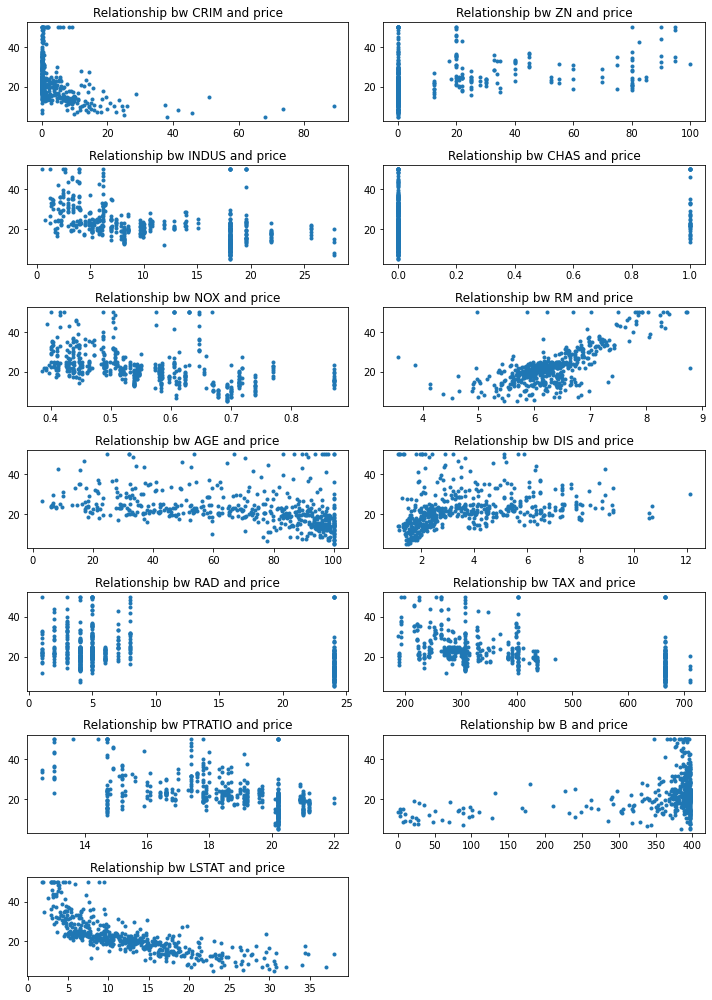

In [8]:
def plotFeatures(col_list,title):
    plt.figure(figsize=(10, 14))
    i = 0
    print(len(col_list))
    for col in col_list:
        i+=1
        plt.subplot(7,2,i)
        plt.plot(df_x[col],df_y,marker='.',linestyle='none')
        plt.title(title % (col))   
        plt.tight_layout()
colnames = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']
plotFeatures(colnames,"Relationship bw %s and price")

These graphs gives a clear intuition of relationship of target variable with features. We can see that RM(Avg. rooms per dwelling) has very linear relationship with price.

Another option to see the relationship is to plot the correlation of features and target variable with each other using heatmap of seaborn.This is much more descriptive also.

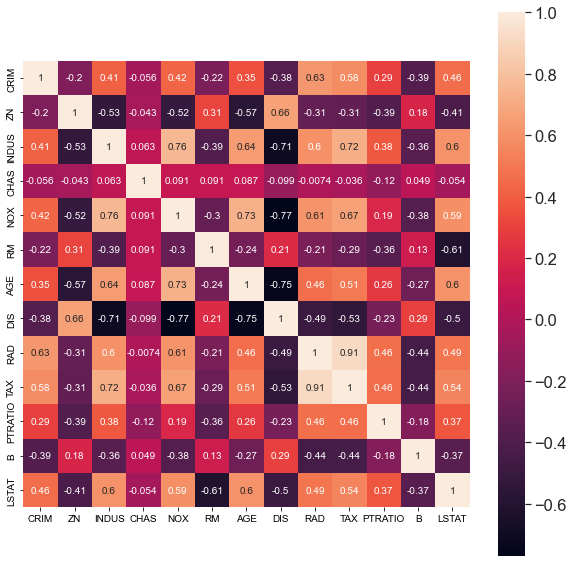

In [9]:
import seaborn as sns
fig = plt.subplots (figsize = (10,10))
sns.set (font_scale = 1.5)
sns.heatmap (df_x.corr (), square = True, cbar = True, annot = True, annot_kws = {'size': 10})
plt.show ()


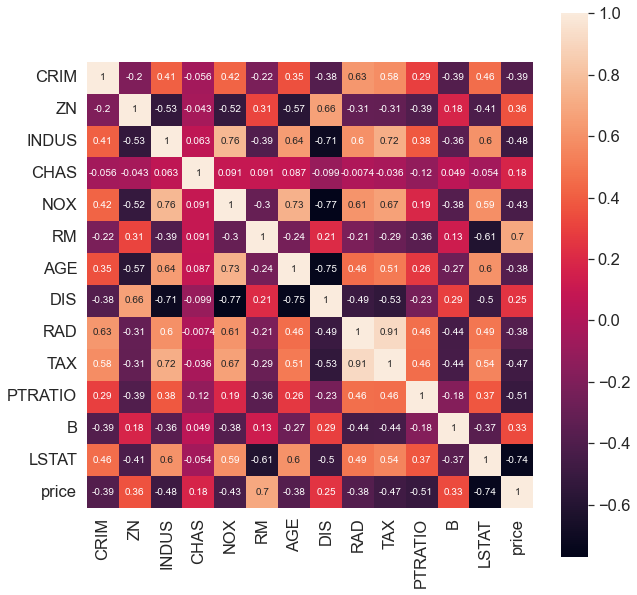

In [10]:
df = pd.concat([df_x, df_y],axis = 1,sort = True)
fig = plt.subplots (figsize = (10,10))
sns.set (font_scale = 1.5)
sns.heatmap (df.corr (), square = True, cbar = True, annot = True, annot_kws = {'size': 10})
plt.show ()

In [11]:
df.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


In [12]:
df[df.columns[:]].corr()['price'][:].sort_values(ascending=False)

price      1.000000
RM         0.695360
ZN         0.360445
B          0.333461
DIS        0.249929
CHAS       0.175260
AGE       -0.376955
RAD       -0.381626
CRIM      -0.388305
NOX       -0.427321
TAX       -0.468536
INDUS     -0.483725
PTRATIO   -0.507787
LSTAT     -0.737663
Name: price, dtype: float64

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.2, random_state=42)

In [14]:
## Finding p-values using statmodels

Xs = X_train.values
y = y_train.values

In [15]:
import statsmodels.api as sm 
X2 = sm.add_constant(Xs)
est = sm.OLS(y,X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.743
Method:                 Least Squares   F-statistic:                     90.43
Date:                Fri, 17 Jun 2022   Prob (F-statistic):          6.21e-109
Time:                        06:42:58   Log-Likelihood:                -1194.3
No. Observations:                 404   AIC:                             2417.
Df Residuals:                     390   BIC:                             2473.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         30.2468      5.677      5.328      0.0

# Which features have a strong relationship to median price?

The feature RM(0.695360) has the strongest relationship to price as evident from the .corr values above and the graph plot
RM has the strongest positive correlationship with the price

The other features that have a strong relationship to price (.corr()>0.4) are:

LSTAT (-0.737663) -> (LSTAT has the strongest negative correlation with price),
TAX       -0.468536,
INDUS     -0.483725,
PTRATIO   -0.507787

C:\Users\srikar\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


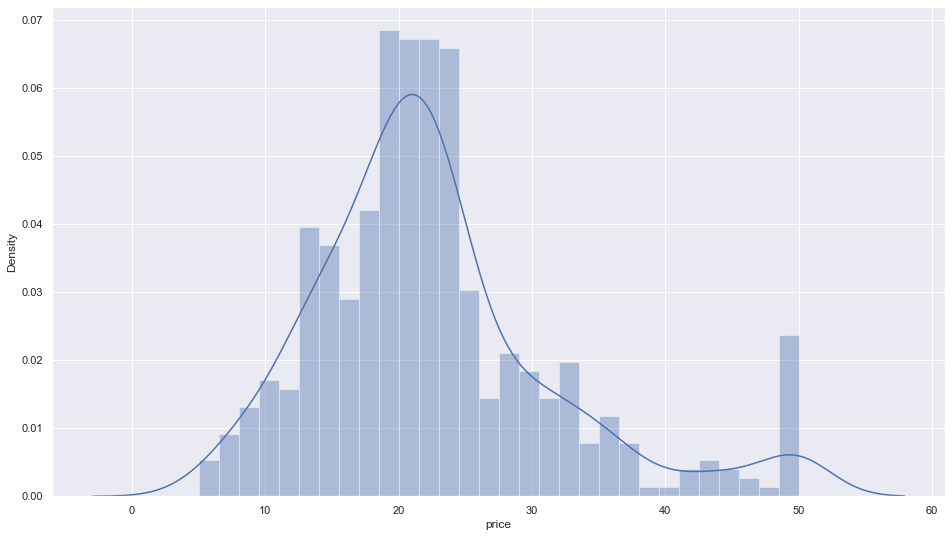

In [16]:
sns.set(rc={'figure.figsize':(16,9)})
sns.distplot(df['price'], bins=30)
plt.show()

C:\Users\srikar\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


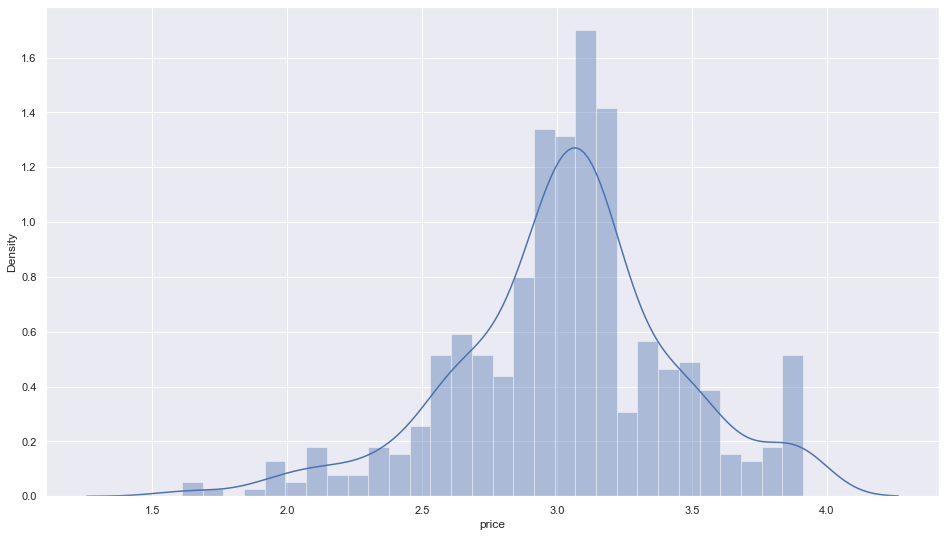

In [17]:
sns.set(rc={'figure.figsize':(16,9)})
sns.distplot(np.log(df['price']), bins=30)
plt.show()

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.2, random_state=42)

In [19]:
from sklearn.linear_model import LinearRegression  
linear_model = LinearRegression()  
linear_model.fit(X_train, y_train)

LinearRegression()

In [20]:
# Intercept
print(linear_model.intercept_)

[30.24675099]


In [21]:
X_train.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
477,15.02340,0.0,18.10,0.0,0.6140,5.304,97.3,2.1007,24.0,666.0,20.2,349.48,24.91
15,0.62739,0.0,8.14,0.0,0.5380,5.834,56.5,4.4986,4.0,307.0,21.0,395.62,8.47
332,0.03466,35.0,6.06,0.0,0.4379,6.031,23.3,6.6407,1.0,304.0,16.9,362.25,7.83
423,7.05042,0.0,18.10,0.0,0.6140,6.103,85.1,2.0218,24.0,666.0,20.2,2.52,23.29
19,0.72580,0.0,8.14,0.0,0.5380,5.727,69.5,3.7965,4.0,307.0,21.0,390.95,11.28


In [22]:
# The coefficients
print('Coefficients: \n', linear_model.coef_)

Coefficients: 
 [[-1.13055924e-01  3.01104641e-02  4.03807204e-02  2.78443820e+00
  -1.72026334e+01  4.43883520e+00 -6.29636221e-03 -1.44786537e+00
   2.62429736e-01 -1.06467863e-02 -9.15456240e-01  1.23513347e-02
  -5.08571424e-01]]


In [23]:
y_pred = linear_model.predict(X_test)

In [24]:
# Explained variance score: 1 is perfect  R^2  
print('Variance Score: %0.2f' % linear_model.score(X_train, y_train))

Variance Score: 0.75


In [25]:
# Adjusted R^2 
adjusted_r_squared = 1 - (1-linear_model.score(X_train, y_train))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1)
adjusted_r_squared

0.7425818237612329

In [26]:
# Explained variance score: 1 is perfect 
print('Variance Score: %0.2f' % linear_model.score(X_test, y_test))

Variance Score: 0.67


In [27]:
from sklearn import metrics  
print('Mean Absolute Error:',  metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error: ',  metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:',  np.sqrt(metrics.mean_squared_error(y_test, y_pred)))


##pd.DataFrame(zip(X.columns, linear_model.coef_), columns = ['features', 'estimatedCoefficients'])

Mean Absolute Error: 3.1890919658878287
Mean Squared Error:  24.291119474973456
Root Mean Squared Error: 4.928602182665331


In [28]:
# Compute R^2 and adjusted R^2 with formulas 
yhat = linear_model.predict(X_train)
SS_Residual = sum((np.asarray(y_train)-yhat)**2)
SS_Total = sum(((np.asarray(y_train))-np.mean(np.asarray(y_train)))**2)
r_squared = 1 - (float(SS_Residual))/SS_Total
adjusted_r_squared = 1 - (1-r_squared)*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1)
print(r_squared, adjusted_r_squared)


[0.75088564] [0.74258182]


Text(0.5, 0, 'Fitted values')

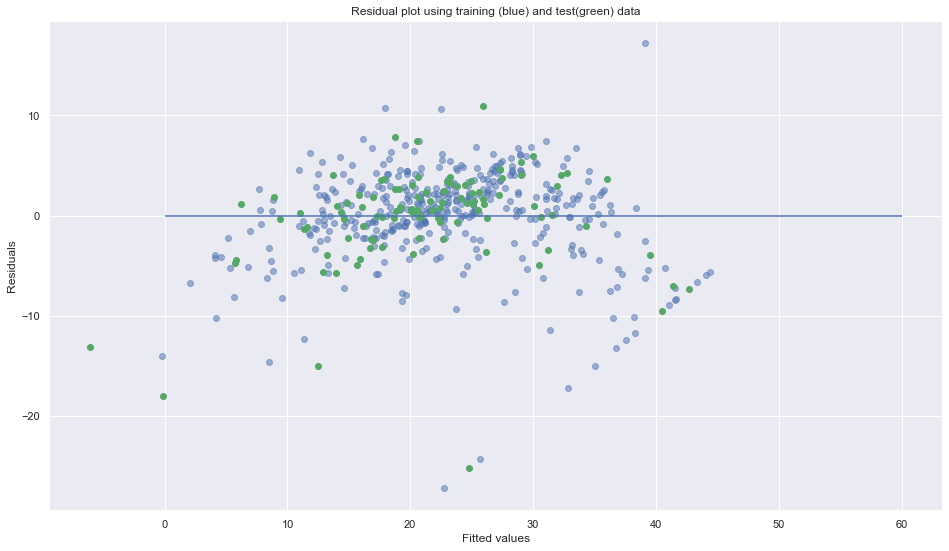

In [29]:
#Residual plot
plt.scatter(linear_model.predict(X_train), linear_model.predict(X_train)-y_train, c= 'b', alpha = 0.5)
plt.scatter(linear_model.predict(X_test), linear_model.predict(X_test)-y_test, c= 'g')
plt.hlines(y = 0, xmin = 0, xmax = 60)
plt.title('Residual plot using training (blue) and test(green) data')
plt.ylabel('Residuals')
plt.xlabel('Fitted values')

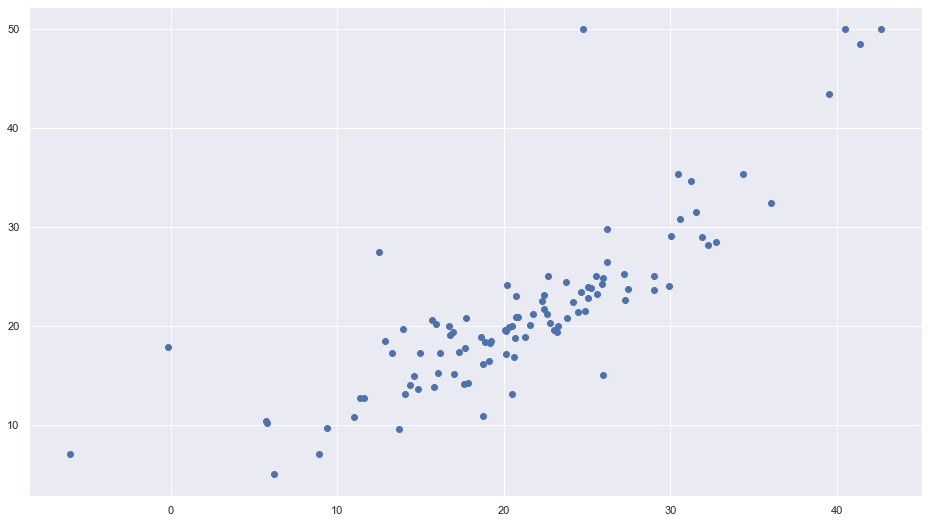

In [30]:
# plot of predicted and test 

plt.scatter(y_pred, y_test)

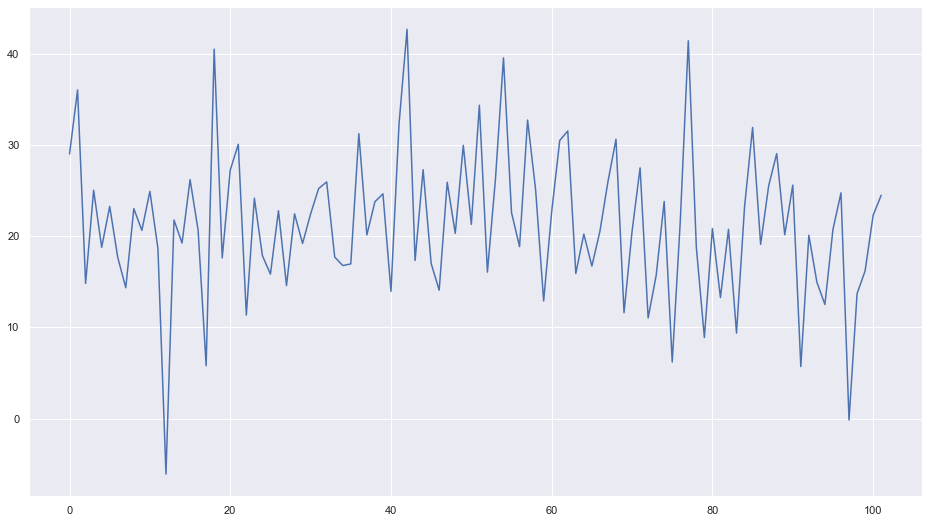

In [31]:
#predicted values of test data
y_pred
plt.plot(y_pred)

# Most important feature

- Based on the above coefficients, RM has the highest importance
- The other important features based on the coefficients are: CHAS(2.78443820e+00), RAD(2.62429736e-01)

# The training with the dropped variables

# Eliminating variables:

- the features INDUS , #ZN, #TAX and AGE have p vakues higher than 0.05
- RAD or TAX have a high correlation from the seaborn map and one of it can be dropped. RAD is removed
- The features dropped based on weak correlation of 0.4 are RAD, AGE, ZN, B, DIS, CHAS

In [32]:
df_sub= df.drop(['RAD','AGE','ZN','B', 'DIS','CHAS','INDUS'], axis =1)

In [33]:
df_sub.shape

(506, 7)

In [34]:
X_sub = df_sub.drop('price', axis =1)
X_sub

,CRIM,NOX,RM,TAX,PTRATIO,LSTAT
0,0.00632,0.538,6.575,296.0,15.3,4.98
1,0.02731,0.469,6.421,242.0,17.8,9.14
2,0.02729,0.469,7.185,242.0,17.8,4.03
3,0.03237,0.458,6.998,222.0,18.7,2.94
4,0.06905,0.458,7.147,222.0,18.7,5.33
...,...,...,...,...,...,...
501,0.06263,0.573,6.593,273.0,21.0,9.67
502,0.04527,0.573,6.120,273.0,21.0,9.08
503,0.06076,0.573,6.976,273.0,21.0,5.64
504,0.10959,0.573,6.794,273.0,21.0,6.48


In [35]:
y_sub = df_sub['price']
y_sub

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: price, Length: 506, dtype: float64

In [36]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_sub, y_sub, test_size=0.2, random_state=42)

In [37]:
from sklearn.linear_model import LinearRegression  
linear_model1 = LinearRegression()  
linear_model1.fit(X_train, y_train)

LinearRegression()

In [38]:
# Intercept
print(linear_model1.intercept_)

11.933780838530502


In [39]:
X_train.head()

,CRIM,NOX,RM,TAX,PTRATIO,LSTAT
477,15.02340,0.6140,5.304,666.0,20.2,24.91
15,0.62739,0.5380,5.834,307.0,21.0,8.47
332,0.03466,0.4379,6.031,304.0,16.9,7.83
423,7.05042,0.6140,6.103,666.0,20.2,23.29
19,0.72580,0.5380,5.727,307.0,21.0,11.28


In [40]:
y_pred = linear_model1.predict(X_test)

In [41]:
# Explained variance score: 1 is perfect  R^2  
print('Variance Score: %0.2f' % linear_model1.score(X_train, y_train))

Variance Score: 0.69


In [42]:
# Adjusted R^2 
adjusted_r_squared = 1 - (1-linear_model1.score(X_train, y_train))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1)
adjusted_r_squared

0.6874299492579756

In [43]:
# Explained variance score: 1 is perfect 
print('Variance Score: %0.2f' % linear_model1.score(X_test, y_test))

Variance Score: 0.62


In [44]:
from sklearn import metrics  
print('Mean Absolute Error:',  metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error: ',  metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:',  np.sqrt(metrics.mean_squared_error(y_test, y_pred)))


##pd.DataFrame(zip(X.columns, linear_model.coef_), columns = ['features', 'estimatedCoefficients'])

Mean Absolute Error: 3.359766520513985
Mean Squared Error:  27.996697590957147
Root Mean Squared Error: 5.29119056460426


In [45]:
# Compute R^2 and adjusted R^2 with formulas 
yhat = linear_model1.predict(X_train)
SS_Residual = sum((np.asarray(y_train)-yhat)**2)
SS_Total = sum(((np.asarray(y_train))-np.mean(np.asarray(y_train)))**2)
r_squared = 1 - (float(SS_Residual))/SS_Total
adjusted_r_squared = 1 - (1-r_squared)*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1)
print(r_squared, adjusted_r_squared)

0.6920835976561199 0.6874299492579756


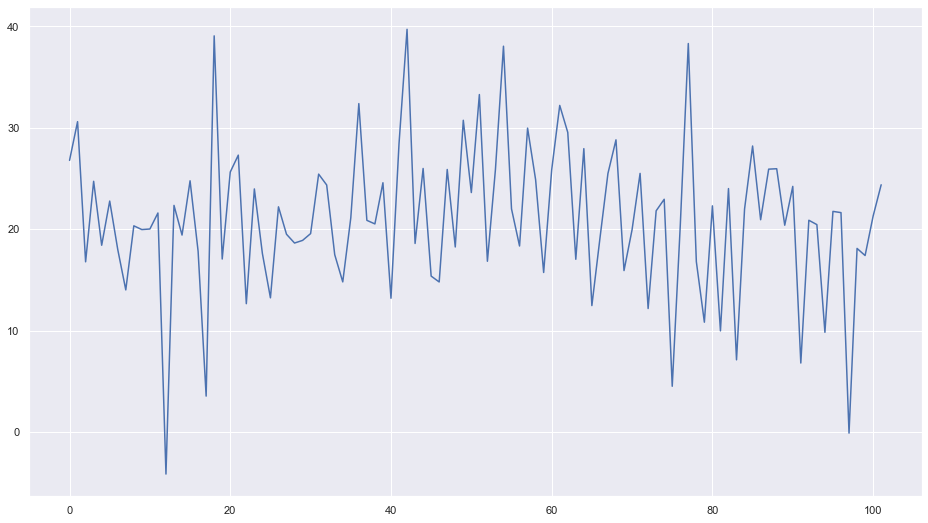

In [46]:
#predicted values of test data
y_pred
plt.plot(y_pred)